In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from numpy import nan,inf
import scipy.constants as sc
import scipy.interpolate as si
import matplotlib as mpl
import glob
from astropy.time import Time
np.set_printoptions(precision=10)
import matplotlib
plt.rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['font.size'] = 13
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 1

# Changing this will affect the size of the plot in Jupyter notebook as well as resolution of the final PDF. Can change later
plt.rcParams['figure.dpi'] = 100

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Serif'
#mpl.rcParams['mathtext.it'] = 'Serif:italic'
#mpl.rcParams['mathtext.bf'] = 'Serif:bold'

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
    
mpl.rcParams['xtick.major.size'] = 6  # default 3.5
mpl.rcParams['ytick.major.size'] = 6  # default 3.5
mpl.rcParams['xtick.minor.size'] =  3  # default 2 
mpl.rcParams['ytick.minor.size'] = 3  # default 2 
    
mpl.rcParams['xtick.major.width'] = 1  # default 0.8
mpl.rcParams['ytick.major.width'] = 1  # default 0.8
mpl.rcParams['xtick.minor.width'] =1  # default 0.6
mpl.rcParams['ytick.minor.width'] = 1  # default 0.6
mpl.rcParams['text.usetex'] = True


MASS_TO_FREQ = sc.eV / sc.h
def plot_timescales( ax,ymin,ymax,annotate=True):

    l10ma_T = np.log10( 1/(1.0*sc.day*1 * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 day",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")
    
    # l10ma_T = np.log10( 1/(1.0*sc.day*14 * MASS_TO_FREQ) )
    # ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    # if annotate==True:
    #     ax.annotate(r"2 weeks",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(1.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 year",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(11.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T ,l10ma_T ],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"Solar Cycle",xy = [l10ma_T ,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(18.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    if annotate==True:
        ax.annotate(r"T$_{\rm obs}$",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")


#rho = 7.68351e-6 * 0.40 #0.46
rho = (0.4 * 1e9 * 100**3) * sc.c**3  * sc.hbar**3 / sc.eV**3
l10S_to_l10ga = lambda l10S,l10ma: l10S+9+l10ma-np.log10(rho)/2


def make_ul_plot(ax,l10ma , ul_auto,ul_full ):
    #fig , ax = plt.subplots(figsize=(5,4))
    #ax.set_title("95% UL (Bayesian approach)")
    #ax.fill_between(np.log10(PPTA_QUIJOTE[:,0]),np.log10(PPTA_QUIJOTE[:,1]),np.zeros(len(PPTA_QUIJOTE)),alpha=0.5,fc='darkgreen',label="PPTA-QUIJOTE")


    _l10ma = np.linspace(-24,-18.5,101)
    #Chandra
    ax.plot(_l10ma,np.log10(5e-13)*np.ones(len(_l10ma)),color="black",ls='--')
    ax.annotate("Chandra\n H1821+643",xy=(-18.5-0.05,np.log10(5e-13)-0.1),size=12,va="top",ha="right")

    #Planck
    ax.plot(_l10ma,_l10ma+9,color="black",ls=':',lw=2)
    ax.annotate("Planck",xy=(-19.3,-10.5),size=14,va="top",ha="right",rotation="25")


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'.',color='blue')
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'-',color='blue',label="Full-corr")
    except:
        pass


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'.',color='red')
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'-',color='red',label="Auto-corr")
    except:
        pass



    ax.set_xlim(-23.5,-18.5)
    ymin = -16
    ymax = -6
    ax.set_ylim(ymin,ymax)
    #plt.title(r"the 95% upper limit on $\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$"+
    #          "\n assuming local DM density " + r"$0.40 {\rm GeV}/{\rm cm}^3$")

    ax.legend(loc=4,prop={'size': 10})

    plot_timescales( ax,ymin,ymax,annotate=True)


    #ax.plot(mock[:,0] , l10S_to_l10ga(mock[:,2],mock[:,0]),'red' )

    #plot_timescales(ax,ymin,ymax)

    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    ax.set_ylabel(r"$\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$")
    ax.grid(axis="y")


def make_bf_plot(ax,l10ma,lbf_af,lbf_nf):

    #fig , ax = plt.subplots(figsize=(5,3))
    ymin = -4
    ymax = 10
    plot_timescales( ax,ymin,ymax,annotate=False)

    try:
        lbf_nf[lbf_nf==inf]=ymax
        lbf_nf[lbf_nf==-inf]=ymin
        ax.plot(l10ma,lbf_nf,'-',color='b',label="Full vs None")
        ax.plot(l10ma,lbf_nf,'.',color='b')
    except:
        pass

    try:
        lbf_af[lbf_af==inf]=ymax
        lbf_af[lbf_af==-inf]=ymin
        ax.plot(l10ma,lbf_af,'-',color='r',label="Full vs Auto")
        ax.plot(l10ma,lbf_af,'.',color='r')
    except:
        pass
    
    
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(-23.5,-18.5)
    ax.plot([-23.5,-18.5],[0,0],lw=2,color="black")


    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    #ax.set_ylabel(r"$\ln $BF$^{\rm full}_{\rm auto}$")
    ax.set_ylabel(r"$\ln $BF")
    ax.grid(axis="y")
    ax.legend(loc=4,prop={'size': 10})

## Data IONFR

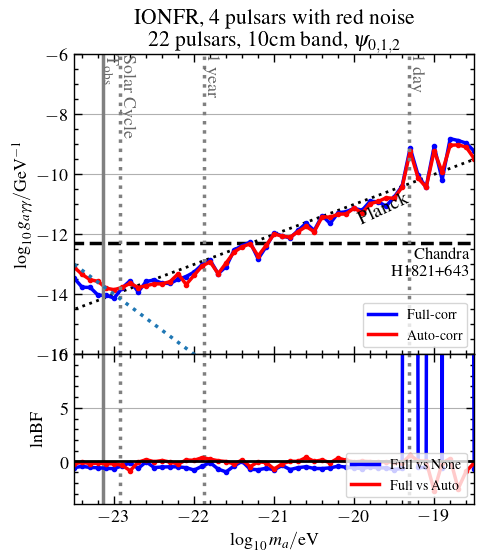

In [3]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-1.351, -1.694, -1.968, -2.126, -2.451, -2.601, -2.627, -2.588,
       -2.828, -2.868, -2.906, -3.007, -3.03 , -2.872, -3.329, -3.116,
       -2.912, -2.87 , -3.369, -3.109, -2.842, -2.774, -2.768, -3.278,
       -3.025, -2.741, -2.919, -3.051, -2.963, -2.894, -3.168, -2.77 ,
       -2.886, -2.886, -2.975, -2.878, -3.148, -2.935, -2.96 , -2.939,
       -3.053, -2.776, -1.686, -2.683, -3.085, -1.974, -2.779, -1.988,
       -2.072, -2.246, -2.732])



ul_full = np.array([-1.718, -2.12 , -2.226, -2.587, -2.69 , -2.881, -2.643, -2.501,
       -2.976, -2.727, -2.779, -2.986, -3.092, -3.055, -3.063, -3.013,
       -2.864, -2.823, -3.368, -3.231, -2.78 , -2.732, -2.718, -3.373,
       -3.067, -2.707, -2.91 , -3.074, -2.924, -2.785, -3.129, -2.733,
       -3.092, -2.836, -2.903, -2.889, -3.054, -2.85 , -2.973, -3.215,
       -3.014, -2.743, -1.581, -2.594, -3.093, -1.826, -3.032, -1.767,
       -1.929, -2.115, -2.482])


make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("IONFR, 4 pulsars with red noise\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-0.212, -0.082, -0.192, -0.151, -0.206, -0.22 , -0.352, -0.859,
       -0.063,  0.169, -0.017,  0.092, -0.054, -0.229,  0.136,  0.111,
        0.36 ,  0.218,  0.069, -0.006, -0.234,  0.141, -0.478, -0.03 ,
       -0.098, -0.709, -0.209,  0.024,  0.009,  0.376,  0.014,  0.139,
       -0.121,  0.311,  0.111, -0.034,  0.029, -0.004, -0.056, -0.044,
       -0.067, -0.137,  0.582,  0.061,  0.011, -2.718, -0.136,  0.258,
       -2.532, -0.912, -0.149])

lbf_nf = np.array([-0.575, -0.457, -0.555, -0.583, -0.638, -0.668, -0.398, -0.132,
       -0.649, -0.028, -0.565, -0.517, -0.492, -0.501, -0.577, -0.802,
       -0.438, -0.101, -0.713, -0.971, -0.405,  0.014, -0.722, -0.77 ,
       -0.631, -0.765, -0.374, -0.75 , -0.574, -0.489, -0.653, -0.658, -0.593, -0.437, -0.534, -0.594,
       -0.664, -0.508, -0.595, -0.595, -0.756, -0.647,inf,-0.55808, -0.552,inf, -0.592,inf,inf,inf,-0.697420])
lbf_nf[[42,45,47,48,49]] = np.array([14502.658, 14578.681, 14671.908, 14536.677, 14389.249])-14197.033215000001
make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


In [4]:
crit = np.where(lbf_nf>20)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T
for c in crit:
    print(c,l10ma[c])


42 -19.3
45 -19.0
47 -18.8
48 -18.7
49 -18.6


## Data NO IONO

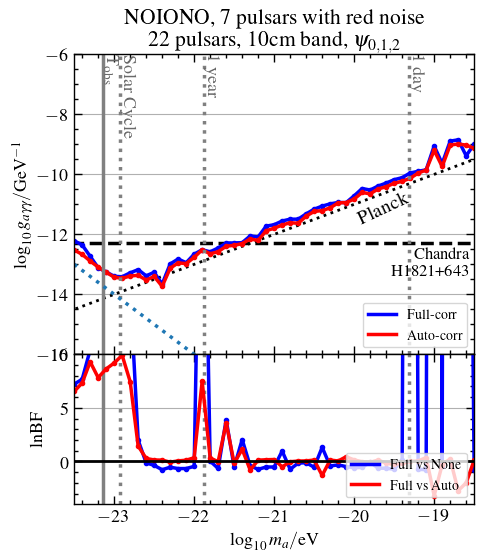

In [5]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-0.779, -1.023, -1.346, -1.646, -1.923, -2.182, -2.324, -2.343,
       -2.422, -2.678, -2.661, -3.088, -2.586, -2.507, -2.63 , -2.523,
       -2.369, -2.604, -2.634, -2.552, -2.621, -2.665, -2.61 , -2.759,
       -2.537, -2.551, -2.546, -2.567, -2.688, -2.549, -2.492, -2.565,
       -2.573, -2.506, -2.597, -2.579, -2.46 , -2.606, -2.541, -2.569,
       -2.553, -2.588, -2.587, -2.514, -2.511, -1.956, -2.594, -1.979,
       -2.044, -2.181, -2.388])


ul_full = np.array([-0.47 , -0.708, -1.188, -1.668, -1.909, -2.154, -2.27 , -2.239,
       -2.232, -2.538, -2.522, -3.014, -2.443, -2.378, -2.602, -2.418,
       -2.368, -2.539, -2.51 , -2.448, -2.542, -2.634, -2.51 , -2.642,
       -2.383, -2.434, -2.411, -2.45 , -2.55 , -2.474, -2.417, -2.415,
       -2.44 , -2.493, -2.597, -2.472, -2.328, -2.478, -2.445, -2.447,
       -2.434, -2.466, -2.41 , -2.454, -2.506, -1.81 , -2.496, -1.849,
       -1.905, -2.536, -2.252])




make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("NOIONO, 7 pulsars with red noise\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([   inf,    inf,    inf,    inf,    inf,    inf,    inf,    inf,
        1.446,  0.282,  0.145,  0.126, -0.06 ,  0.057,  0.12 ,  0.351,
          inf,  0.33 , -0.02 ,  3.617, -0.161,  1.138, -0.788,  0.125,
        0.163,  0.185, -0.501, -0.022,  0.042,  0.055,  0.135, -1.298,
        0.134,  0.048,  0.441,  0.147, -0.023, -0.074,  0.132, -0.165,
       -0.268, -0.179,  0.013,  0.041,  0.369, -3.186, -0.285,  0.23 ,
       -2.716, -1.998,  0.116])
lbf_af[0] = np.log(1.7039) + 6
lbf_af[1] = np.log(3.7891) + 6
lbf_af[2] = np.log(1.3521) + 9
lbf_af[3] = np.log(6.2321) + 6
lbf_af[4] = np.log(14.0000) + 6
lbf_af[5] = np.log(24.3125) + 6
lbf_af[6] = np.log(49.8125) + 6
lbf_af[7] = np.log(4.2941) + 6
lbf_af[16] = np.log(0.2215) + 9

lbf_nf= np.array([   inf,    inf,    inf,    inf,    inf,    inf,    inf,    inf,
        1.987, -0.125, -0.366, -0.766, -0.535, -0.66 , -0.657, -0.455,
          inf,  0.033, -0.65 ,    inf, -0.53 ,  2.048, -0.404, -0.731,
       -0.514, -0.514,  0.973, -0.725, -0.154, -0.114, -0.538,  1.319,
       -0.418, -0.315, -0.478, -0.575, -0.558, -0.057, -0.626, -0.629,
       -0.721,  0.177,    inf, -0.739, -0.759,    inf, -0.455,    inf,
          inf,    inf, -0.792])
lbf_nf[0] = np.log(25.0357)+4
lbf_nf[1] = np.log(1.9622)+7
lbf_nf[2] = np.log(4.111)+9
lbf_nf[3] = np.log(11.9415)+11
lbf_nf[4] = np.log(5.0585)+11
lbf_nf[5] = np.log(2.2970)+15
lbf_nf[6] = np.log(0.3549)+18
lbf_nf[7] = np.log(2.9545)+15
lbf_nf[19] = np.log(2.4595)+3
lbf_nf[16] = 40.566785 
lbf_nf[[42,45,47,48,49]] = np.array([14361.25719299, 14423.3956339 , 14522.92954078, 14437.17273122,
       14271.36876378]) -14197.033215000001


make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


In [6]:
crit = np.where(lbf_nf>5)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T
for c in crit:
    print(c,l10ma[c])

print(crit)

0 -23.5
1 -23.4
2 -23.3
3 -23.2
4 -23.1
5 -23.0
6 -22.9
7 -22.8
16 -21.9
42 -19.3
45 -19.0
47 -18.8
48 -18.7
49 -18.6
[ 0  1  2  3  4  5  6  7 16 42 45 47 48 49]


# Mock Data

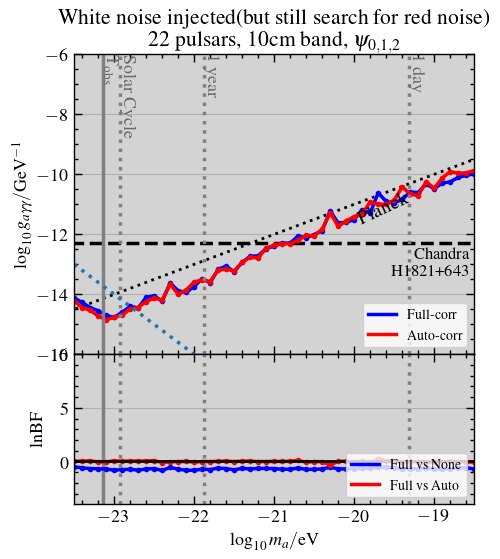

In [16]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-2.47 , -2.804, -2.985, -3.279, -3.501, -3.524, -3.551, -3.447,
       -3.496, -3.396, -3.384, -3.539, -3.123, -3.554, -3.514, -3.342,
       -3.375, -3.528, -3.251, -3.314, -3.477, -3.291, -3.222, -3.344,
       -3.122, -3.111, -3.163, -3.268, -3.253, -3.193, -3.299, -3.183,
       -2.734, -3.292, -3.205, -3.165, -3.179, -2.876, -3.051, -3.159,
       -3.12 , -2.776, -3.111, -3.273, -2.899, -3.22 , -2.98 , -2.864,
       -3.017, -3.106, -3.128])

ul_full = np.array([-2.377, -2.627, -2.899, -3.104, -3.36 , -3.523, -3.451, -3.36 ,
       -3.506, -3.259, -3.299, -3.59 , -3.076, -3.438, -3.594, -3.496,
       -3.328, -3.569, -3.219, -3.218, -3.506, -3.287, -3.189, -3.272,
       -3.128, -3.149, -3.151, -3.248, -3.111, -3.267, -3.265, -3.233,
       -2.671, -3.181, -3.25 , -3.269, -3.033, -3.244, -2.675, -3.058,
       -3.207, -3.192, -3.044, -3.163, -2.975, -3.238, -3.146, -3.206,
       -3.161, -3.189, -3.24 ])


axes[0].set_facecolor('lightgray')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("White noise injected(but still search for red noise)\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 0.021,  0.041,  0.063, -0.043, -0.04 ,  0.065,  0.029,  0.042,
        0.043,  0.046,  0.087, -0.095, -0.032, -0.011,  0.003, -0.056,
       -0.004, -0.008,  0.011,  0.048, -0.014,  0.038,  0.037, -0.007,
       -0.005,  0.011,  0.006,  0.027,  0.097, -0.066, -0.008, -0.022,
       -0.336,  0.009,  0.021, -0.046,  0.011, -0.179,  0.251,  0.038,
       -0.027, -0.096, -0.02 , -0.023, -0.173, -0.003, -0.022,  0.007,
       -0.016, -0.056, -0.05 ])




lbf_nf = np.array([-0.497, -0.595, -0.667, -0.68 , -0.709, -0.806, -0.756, -0.729,
       -0.809, -0.697, -0.662, -0.834, -0.557, -0.719, -0.817, -0.819,
       -0.717, -0.758, -0.611, -0.663, -0.777, -0.639, -0.698, -0.647,
       -0.651, -0.661, -0.725, -0.722, -0.618, -0.735, -0.729, -0.695,
       -0.542, -0.681, -0.698, -0.669, -0.611, -0.643, -0.546, -0.529,
       -0.603, -0.657, -0.663, -0.665, -0.597, -0.694, -0.687, -0.674,
       -0.598, -0.586, -0.691])


axes[1].set_facecolor('lightgray')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/mock1.jpg")


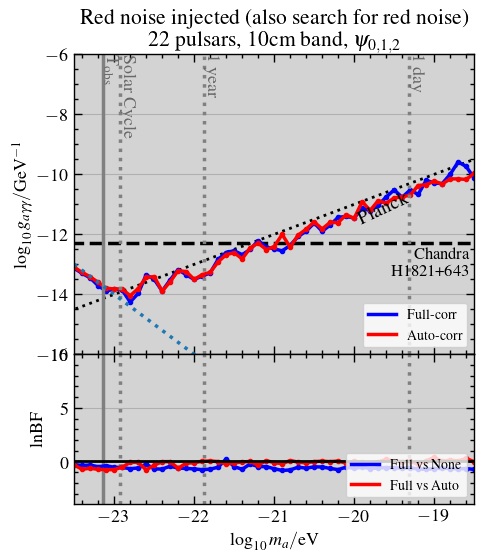

In [15]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.356, -1.626, -1.87 , -2.158, -2.45 , -2.579, -2.675, -3.004,
       -2.865, -2.59 , -2.664, -3.251, -3.034, -2.766, -2.898, -3.259,
       -3.201, -3.223, -2.973, -2.833, -2.866, -3.174, -2.91 , -2.847,
       -3.162, -3.165, -2.858, -3.385, -3.082, -2.985, -2.843, -3.175,
       -3.058, -3.164, -3.   , -3.226, -2.765, -3.161, -2.934, -3.118,
       -3.045, -3.103, -3.149, -2.93 , -3.001, -2.981, -3.18 , -3.107,
       -3.207, -3.326, -3.225])

ul_full = np.array([-1.385, -1.659, -1.906, -2.267, -2.548, -2.576, -2.71 , -3.213,
       -3.025, -2.506, -2.753, -3.247, -2.976, -2.731, -3.004, -3.259,
       -3.248, -3.24 , -2.89 , -2.762, -2.802, -3.034, -2.96 , -2.767,
       -3.077, -3.239, -3.407, -3.325, -3.125, -3.051, -2.877, -3.253,
       -3.146, -2.989, -3.06 , -3.213, -2.976, -3.165, -3.087, -2.913,
       -2.774, -3.121, -2.978, -3.226, -2.857, -3.041, -3.167, -2.955,
       -2.643, -2.894, -3.38 ])


axes[0].set_facecolor('lightgray')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Red noise injected (also search for red noise)\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-0.336, -0.726, -0.627, -0.737, -0.765, -0.756, -0.534, -0.084,
       -0.077, -0.784, -0.351, -0.016, -0.014, -0.638, -0.153, -0.125,
        0.029,  0.05 , -0.01 , -0.23 , -0.131, -0.045,  0.003, -0.341,
        0.079, -0.105, -0.208,  0.087, -0.057, -0.134, -0.008,  0.031,
       -0.014,  0.046, -0.162,  0.027, -0.087, -0.136, -0.07 ,  0.201,
        0.012, -0.008,  0.003, -0.251,  0.06 ,  0.378,  0.015,  0.132,
        0.042,  0.284, -0.024])




lbf_nf = np.array([-0.282, -0.373, -0.33 , -0.489, -0.392, -0.541, -0.555, -0.673,
       -0.604, -0.244, -0.692, -0.706, -0.442, -0.621, -0.648, -0.693,
       -0.765, -0.718, -0.533,  0.236, -0.478, -0.729, -0.228, -0.479,
       -0.475, -0.675, -0.836, -0.789, -0.529, -0.619, -0.5  , -0.511,
       -0.648, -0.758, -0.526, -0.64 , -0.525, -0.658, -0.605, -0.569,
       -0.587, -0.621, -0.598, -0.693, -0.731, -0.664, -0.628, -0.659,
       -0.687, -0.661, -0.738])


axes[1].set_facecolor('lightgray')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/mock1.jpg")


In [ ]:
crit = np.where(lbf_nf>10)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T
crit

## -23.0

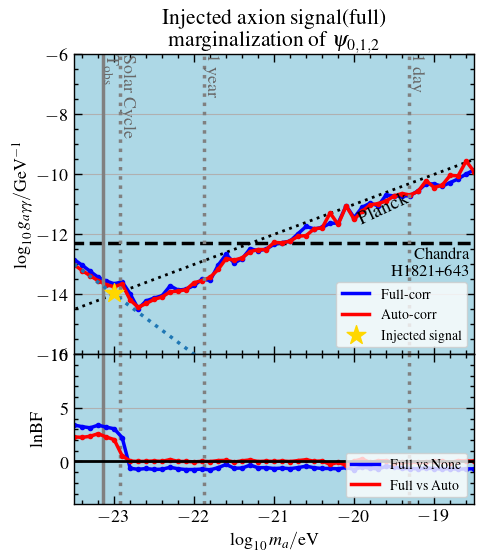

In [8]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.269, -1.563, -1.837, -2.103, -2.336, -2.501, -2.515, -3.142,
       -3.489, -3.461, -3.423, -3.443, -3.369, -3.452, -3.495, -3.365,
       -3.4  , -3.387, -3.227, -2.962, -3.116, -3.139, -3.031, -3.063,
       -3.163, -3.026, -3.14 , -3.181, -3.118, -3.197, -3.073, -3.138,
       -2.745, -3.227, -2.707, -3.258, -3.087, -2.977, -3.029, -3.047,
       -2.973, -2.995, -3.145, -3.121, -2.868, -3.195, -3.218, -2.991,
       -3.105, -2.713, -3.17 ])

ul_full = np.array([-1.097, -1.385, -1.688, -1.988, -2.21 , -2.405, -2.436, -2.941,
       -3.535, -3.374, -3.379, -3.399, -3.173, -3.416, -3.484, -3.459,
       -3.351, -3.492, -3.084, -2.821, -3.21 , -3.168, -2.935, -3.102,
       -3.149, -3.087, -3.131, -3.183, -3.03 , -2.892, -3.076, -3.127,
       -3.087, -3.182, -2.705, -3.2  , -2.952, -2.917, -3.107, -2.841,
       -2.979, -3.085, -3.163, -3.105, -2.963, -3.079, -3.252, -3.231,
       -3.207, -3.146, -3.106])

axes[0].scatter(-23,l10S_to_l10ga(-2.7,-23),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 2.294e+00,  2.251e+00,  2.354e+00,  2.596e+00,  2.288e+00,
        2.044e+00,  5.288e-01,  4.083e-02,  4.254e-03,  1.689e-02,
        4.711e-02,  1.317e-02,  1.823e-01,  1.810e-03,  7.737e-03,
       -3.525e-02,  1.942e-02, -3.909e-03,  8.338e-02,  1.050e-01,
       -4.707e-02,  6.227e-02,  1.480e-01, -9.809e-04,  3.684e-02,
        2.438e-03,  4.088e-02, -2.282e-03,  8.752e-02,  1.646e-01,
        1.820e-02,  5.231e-02, -2.773e-01, -7.316e-02, -3.608e-01,
        4.382e-02,  2.356e-01, -9.215e-02,  6.151e-02,  7.337e-02,
       -1.054e-01, -7.160e-02, -6.645e-02, -7.458e-02, -2.423e-02,
        1.041e-02,  4.155e-02, -1.040e-01,  7.293e-02,  4.610e-02,
        4.135e-02])



lbf_nf = np.array([ 3.405,  3.249,  3.144,  3.391,  3.208,  3.055,  2.234, -0.633,
       -0.729, -0.654, -0.741, -0.722, -0.543, -0.681, -0.752, -0.748,
       -0.709, -0.776, -0.575, -0.276, -0.628, -0.613, -0.338, -0.582,
       -0.571, -0.657, -0.616, -0.668, -0.566, -0.436, -0.584, -0.653,
       -0.648, -0.685, -0.56 , -0.748, -0.518, -0.622, -0.693, -0.453,
       -0.526, -0.65 , -0.657, -0.678, -0.626, -0.656, -0.708, -0.661,
       -0.718, -0.685, -0.689])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/mock1.jpg")


## -22.0

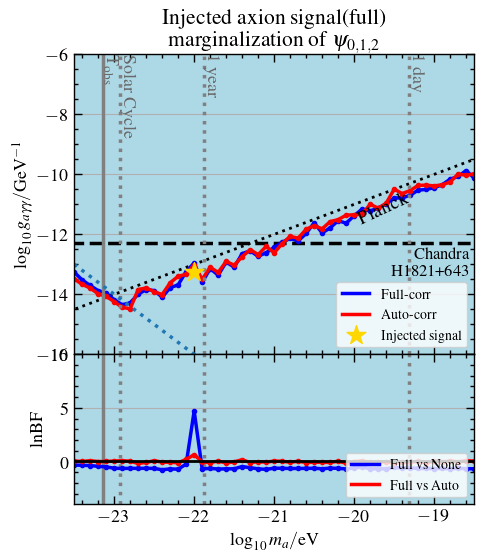

In [18]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.742, -2.023, -2.247, -2.539, -2.727, -2.997, -3.292, -3.434,
       -2.897, -2.942, -3.169, -3.363, -3.07 , -2.956, -2.985, -2.769,
       -3.358, -3.051, -3.327, -3.058, -3.286, -3.1  , -2.966, -3.232,
       -3.058, -3.372, -3.166, -3.022, -3.183, -2.987, -2.964, -3.173,
       -3.031, -3.065, -3.017, -3.102, -3.182, -2.952, -3.184, -3.123,
       -2.749, -2.997, -2.997, -2.925, -3.016, -3.142, -3.204, -3.214,
       -3.043, -3.188, -3.237])

ul_full = np.array([-1.515, -1.877, -2.161, -2.434, -2.609, -2.935, -3.203, -3.24 ,
       -3.049, -2.997, -3.13 , -3.449, -3.234, -3.239, -2.897, -2.713,
       -3.461, -3.095, -3.417, -3.079, -3.349, -3.   , -3.005, -3.287,
       -3.269, -3.193, -3.118, -3.094, -3.28 , -3.123, -2.873, -3.31 ,
       -3.239, -3.101, -3.285, -3.135, -3.012, -3.176, -3.179, -3.14 ,
       -3.045, -3.141, -3.152, -3.083, -3.158, -3.201, -3.203, -3.118,
       -3.124, -3.03 , -3.379])


axes[0].scatter(-22,l10S_to_l10ga(-3.0,-22),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 4.590e-02,  4.409e-03,  7.515e-02, -4.784e-03,  1.283e-03,
        4.285e-02,  7.522e-02,  2.613e-02, -1.781e-01, -8.820e-02,
        7.264e-02, -5.587e-02, -7.631e-02, -1.170e-01,  1.973e-01,
        6.395e-01, -3.709e-02, -1.051e-01,  3.834e-02, -1.376e-01,
       -2.965e-02,  1.659e-01, -1.015e-01, -1.851e-02, -6.428e-02,
        4.406e-02,  1.932e-02, -6.767e-02,  1.943e-02, -9.421e-02,
       -6.307e-02, -7.488e-02, -8.931e-02,  2.482e-02, -1.586e-01,
       -8.647e-03,  5.650e-02, -7.959e-02, -3.724e-02, -4.837e-02,
       -1.440e-01, -6.078e-02, -5.856e-02, -4.304e-04, -1.203e-01,
        1.890e-02, -4.856e-02,  4.753e-02, -3.777e-02,  8.088e-02,
        3.495e-02])


lbf_nf = np.array([-0.325, -0.355, -0.38 , -0.448, -0.504, -0.628, -0.651, -0.637,
       -0.644, -0.631, -0.648, -0.769, -0.692, -0.717, -0.241,  4.709,
       -0.691, -0.641, -0.704, -0.684, -0.681, -0.473, -0.579, -0.686,
       -0.733, -0.625, -0.636, -0.654, -0.65 , -0.644, -0.633, -0.68 ,
       -0.619, -0.638, -0.699, -0.598, -0.506, -0.69 , -0.67 , -0.69 ,
       -0.554, -0.606, -0.602, -0.65 , -0.653, -0.659, -0.643, -0.688,
       -0.624, -0.679, -0.68 ])



axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/mock3.jpg")


## -21.0

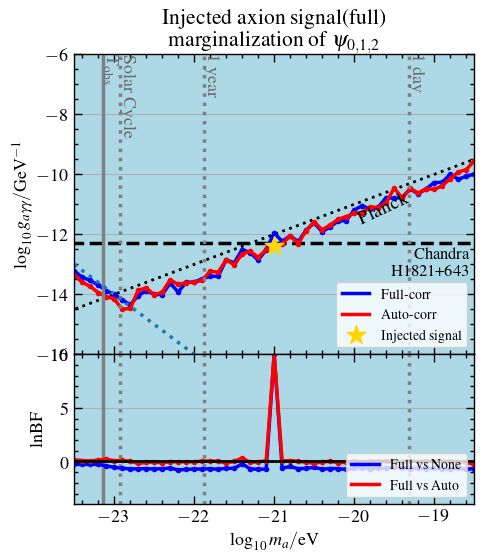

In [21]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.607, -1.953, -2.19 , -2.497, -2.73 , -2.907, -3.353, -3.424,
       -2.922, -2.941, -3.271, -3.285, -2.974, -3.227, -3.263, -3.353,
       -3.391, -3.183, -3.316, -3.006, -3.271, -3.015, -3.017, -3.324,
       -3.161,    nan, -3.163, -3.01 , -3.367, -3.028, -2.84 , -3.206,
       -3.142, -3.055, -3.063, -3.059, -3.137, -3.039, -3.162, -3.106,
       -2.711, -3.149, -2.927, -3.176, -3.133, -3.259, -3.239, -3.101,
       -2.981, -2.999, -2.81 ])


ul_full = np.array([-1.476, -1.784, -1.994, -2.244, -2.54 , -2.75 , -3.039, -3.302,
       -3.103, -3.031, -3.254, -3.368, -3.082, -3.48 , -3.253, -3.351,
       -3.339, -3.353, -3.455, -3.   , -3.212, -2.862, -3.066, -3.413,
       -3.173, -2.708, -3.09 , -3.002, -3.3  , -3.016, -2.872, -3.271,
       -3.203, -3.116, -3.197, -2.946, -2.903, -3.115, -3.155, -2.93 ,
       -3.059, -3.122, -2.945, -3.204, -3.142, -3.029, -3.126, -2.952,
       -3.221, -3.221, -3.25 ])



axes[0].scatter(-21,l10S_to_l10ga(-3.15,-21),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 0.169,  0.086,  0.045,  0.136,  0.21 ,  0.081,  0.095,  0.025,
       -0.177, -0.093, -0.043, -0.125, -0.006, -0.039, -0.022, -0.03 ,
        0.036,  0.041,  0.019, -0.145,  0.019,  0.324, -0.093, -0.02 ,
        0.054,    inf,  0.048,  0.086,  0.014, -0.069, -0.169, -0.027,
        0.01 , -0.099, -0.07 ,  0.046, -0.021,  0.028,  0.007,  0.054,
       -0.157, -0.047,  0.038, -0.008,  0.002,  0.003,  0.011,  0.005,
       -0.109, -0.046, -0.298])


lbf_nf = np.array([-0.27 , -0.279, -0.267, -0.271, -0.404, -0.548, -0.628, -0.697,
       -0.685, -0.663, -0.707, -0.667, -0.619, -0.782, -0.744, -0.696,
       -0.715, -0.668, -0.73 , -0.628, -0.641, -0.216, -0.685, -0.724,
       -0.709,    inf, -0.625, -0.464, -0.676, -0.645, -0.541, -0.723,
       -0.658, -0.665, -0.738, -0.637, -0.564, -0.662, -0.625, -0.654,
       -0.492, -0.618, -0.656, -0.615, -0.655, -0.623, -0.702, -0.706,
       -0.652, -0.724, -0.659])


       

axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/mock4.jpg")


# Single pulsar upper limit

In [ ]:
# import json
# with open("Fig_1_data.json",'w') as f:
#     json.dump(all_data,f,indent=2)

In [ ]:
# All_Results = {}
# PSR_NAME_LIST =  ['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
# for psrn in PSR_NAME_LIST:
#     All_Results.update({psrn:{}})
    

In [ ]:
import json
with open("Fig_1_data.json",'r') as f:
    all_data = json.load(f)

In [ ]:
l10ma = np.arange(5,56)*0.1 -24
PSRNS=['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
for psrn in PSRNS:
    fig,ax = plt.subplots(figsize=(8,6))
    ax.grid()
    ax.set_xlim(-23.5,-18.5)
    ymin = -3.5
    ymax = 1.5
    plot_timescales(ax,ymin,ymax,annotate=False)
    plt.ylim(ymin,ymax)
    try:
        ax.plot( l10ma , all_data[psrn]["NOIONO_NORED"] , 'k--' , label="No iono, no red noise" , lw=1 )
    except:
        pass
    try:
        ax.plot( l10ma , all_data[psrn]["NOIONO_RED"] ,'k-', label="No iono, with red noise" , lw=1 )
    except:
        pass
    try:
        ax.plot( l10ma , all_data[psrn]["IONFR_NORED"] ,'r--', label="IONFR, no red noise" , lw=1 )
    except:
        pass
    try:
        ax.plot( l10ma , all_data[psrn]["IONFR_RED"] ,'r-', label="IONFR, with red noise" , lw=1 )
    except:
        pass
    plt.title(psrn)
    ax.legend(ncol=2)



    plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    plt.ylabel(r"$\log_{10}S_a$/rad 95\% upper limit")

    plt.savefig("spl_"+psrn+".jpg",bbox_inches='tight')
    if psrn !="J0437-4715":
        plt.close()